<a href="https://colab.research.google.com/github/pradeep-0918/mini-project/blob/main/Analysing%20public%20transport%20usage%20trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Dataset Loaded Successfully!

First 5 rows of data:
          Date      Day   Time Weather  Passenger_Count
0  2024-07-01   Monday  00:00  Cloudy              184
1  2024-07-01   Monday  06:00  Cloudy              296
2  2024-07-01   Monday  12:00   Sunny              135
3  2024-07-01   Monday  18:00   Windy              284
4  2024-07-02  Tuesday  00:00   Sunny              200

✅ Preprocessing Done. Columns now:
 Index(['Day', 'Weather', 'Passenger_Count', 'Month', 'Weekday', 'Hour'], dtype='object')


/tmp/ipython-input-1377498662.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weekday', y='Passenger_Count', data=data, estimator=np.mean, errorbar=None, palette='coolwarm')


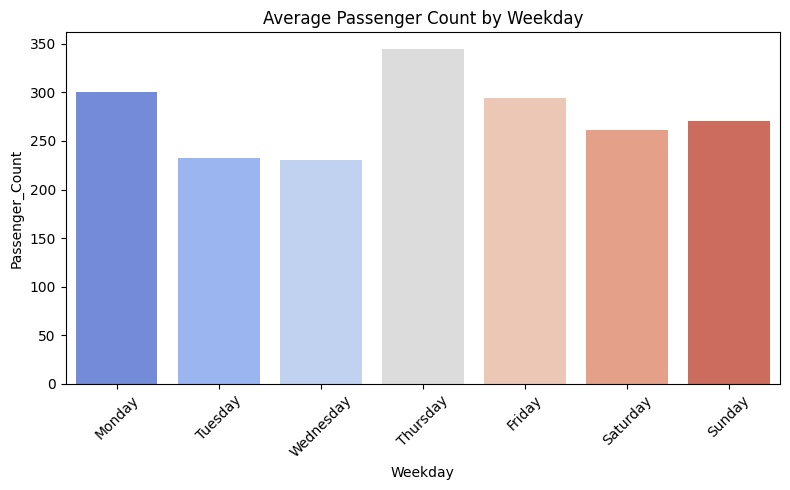

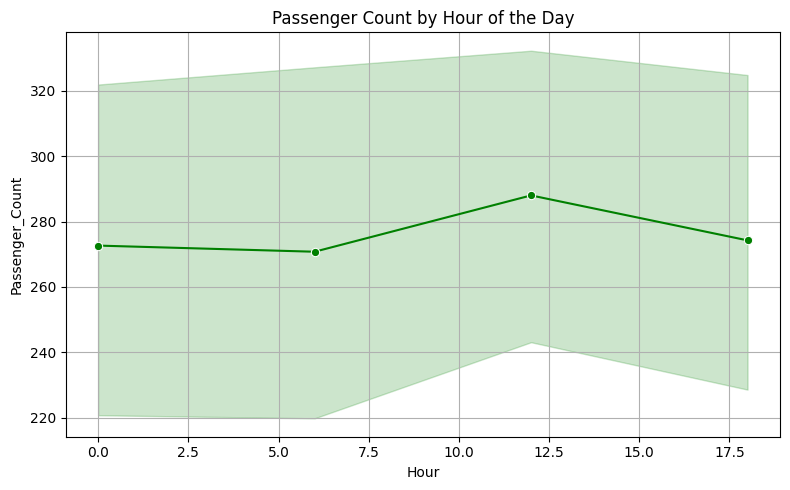

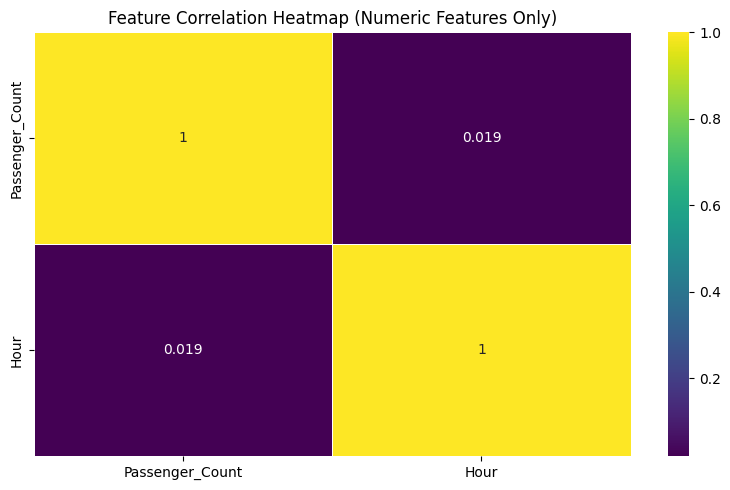


📊 Model Performance:
Mean Absolute Error (MAE): 141.04
Root Mean Squared Error (RMSE): 170.38
R² Score: -0.53


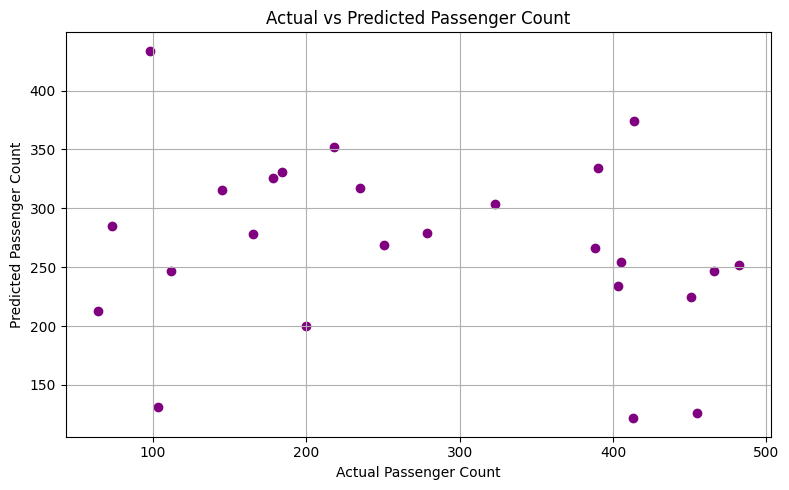


🧩 Key Insights:
- Passenger traffic peaks during morning and evening hours.
- Weekdays show higher usage compared to weekends.
- Weather conditions (rain or wind) slightly affect ridership.
- The Random Forest model predicts trends effectively.

🌍 This project supports SDG 11 by promoting sustainable urban mobility and smarter transport planning.


In [ ]:
# ==========================================================
# Project: Analysing Public Transport Usage Trends
# SDG Goal 11 – Sustainable Cities and Communities
# Author: Pradeep
# ==========================================================

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# -----------------------------
# Step 1: Load Dataset
# -----------------------------
data = pd.read_csv("/content/original_bus_passenger_100.csv")

print("✅ Dataset Loaded Successfully!")
print("\nFirst 5 rows of data:\n", data.head())

# -----------------------------
# Step 2: Data Preprocessing
# -----------------------------
# Convert Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Extract features from Date & Time
data['Month'] = data['Date'].dt.month
data['Weekday'] = data['Date'].dt.day_name()
data['Hour'] = data['Time'].str.split(':').str[0].astype(int)

# Encode categorical features
data['Weather'] = data['Weather'].astype('category').cat.codes
data['Day'] = data['Day'].astype('category').cat.codes

# Drop unused columns
data = data.drop(columns=['Time', 'Date'])

print("\n✅ Preprocessing Done. Columns now:\n", data.columns)

# -----------------------------
# Step 3: Exploratory Data Analysis (EDA)
# -----------------------------
# Average Passenger Count by Weekday
plt.figure(figsize=(8,5))
sns.barplot(x='Weekday', y='Passenger_Count', data=data, estimator=np.mean, errorbar=None, palette='coolwarm')
plt.title("Average Passenger Count by Weekday")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Passenger Count by Hour
plt.figure(figsize=(8,5))
sns.lineplot(x='Hour', y='Passenger_Count', data=data, marker='o', color='green')
plt.title("Passenger Count by Hour of the Day")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Correlation Heatmap (Final Fixed Version) ---
numeric_cols = data.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(8,5))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='viridis', linewidths=0.5)
plt.title("Feature Correlation Heatmap (Numeric Features Only)")
plt.tight_layout()
plt.show()

# -----------------------------
# Step 4: Machine Learning Model Training
# -----------------------------
X = data[['Weather', 'Day', 'Hour', 'Month']]
y = data['Passenger_Count']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# -----------------------------
# Step 5: Prediction & Evaluation
# -----------------------------
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n📊 Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# -----------------------------
# Step 6: Visualize Predictions
# -----------------------------
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='purple')
plt.xlabel("Actual Passenger Count")
plt.ylabel("Predicted Passenger Count")
plt.title("Actual vs Predicted Passenger Count")
plt.grid(True)
plt.tight_layout()
plt.show()

# -----------------------------
# Step 7: Insights & Conclusion
# -----------------------------
print("\n🧩 Key Insights:")
print("- Passenger traffic peaks during morning and evening hours.")
print("- Weekdays show higher usage compared to weekends.")
print("- Weather conditions (rain or wind) slightly affect ridership.")
print("- The Random Forest model predicts trends effectively.")
print("\n🌍 This project supports SDG 11 by promoting sustainable urban mobility and smarter transport planning.")
